<a href="https://colab.research.google.com/github/abbasKareem/image-classification-with-Tensorflow/blob/master/Male_Female_Eyes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prepare the dataset folders

In [ ]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow_hub as hub



In [ ]:
os.makedirs('dataset/train/maleeyes')
os.makedirs('dataset/train/femaleeyes')

os.makedirs('dataset/test/maleeyes')
os.makedirs('dataset/test/femaleeyes')



### copy 10% of dataset in the drive to the datset directory

In [ ]:
kaggle_path = 'drive/MyDrive/Kaggle/data/'

# =====================================================================
# Copy from 'kaggle_path/data/train/maleeyes' to 'dataset/train/maleeyes'
SOURCE_PATH = 'drive/MyDrive/Kaggle/data/train/maleeyes/'
DIST_PATH = 'dataset/train/maleeyes/'
numbers = 250
counter = 0

for filename in os.listdir(SOURCE_PATH):
  counter = counter + 1
  file_path = os.path.join(SOURCE_PATH, filename)
  if os.path.exists(file_path):
    shutil.copy(file_path, DIST_PATH)   
  else:
    print("NO")
  if counter == numbers:
    break
  

# =====================================================================
# Copy from 'kaggle_path/data/train/femaleeyes' to 'dataset/train/femaleeyes'
SOURCE_PATH = 'drive/MyDrive/Kaggle/data/train/femaleeyes/'
DIST_PATH = 'dataset/train/femaleeyes/'
numbers = 250
counter = 0

for filename in os.listdir(SOURCE_PATH):
  counter = counter + 1
  file_path = os.path.join(SOURCE_PATH, filename)
  if os.path.exists(file_path):
    shutil.copy(file_path, DIST_PATH)   
  else:
    print("NO")
  if counter == numbers:
    print(len(os.listdir('dataset/train/femaleeyes')))
    break
  

# =====================================================================
# Copy from 'kaggle_path/data/test/maleeyes' to 'dataset/test/maleeyes'
SOURCE_PATH = 'drive/MyDrive/Kaggle/data/test/maleeyes/'
DIST_PATH = 'dataset/test/maleeyes/'
numbers = 50
counter = 0

for filename in os.listdir(SOURCE_PATH):
  counter = counter + 1
  file_path = os.path.join(SOURCE_PATH, filename)
  if os.path.exists(file_path):
    shutil.copy(file_path, DIST_PATH)   
  else:
    print("NO")
  if counter == numbers:
    print(len(os.listdir('dataset/test/maleeyes')))
    break
  
# =====================================================================
# Copy from 'kaggle_path/data/test/femaleeyes' to 'dataset/test/femaleeyes'
SOURCE_PATH = 'drive/MyDrive/Kaggle/data/test/femaleeyes/'
DIST_PATH = 'dataset/test/femaleeyes/'
numbers = 50
counter = 0

for filename in os.listdir(SOURCE_PATH):
  counter = counter + 1
  file_path = os.path.join(SOURCE_PATH, filename)
  if os.path.exists(file_path):
    shutil.copy(file_path, DIST_PATH)   
  else:
    print("NO")
  if counter == numbers:
    print(len(os.listdir('dataset/test/femaleeyes')))
    break
  


250
50
50


###Create helper functions

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import datetime


IMAGE_SHAPE= (224, 224)
BATCH_SIZE=32


# View an image
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") # show the shape of the image
  return img


def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback
  


def create_model(model_url, num_classes=1):
  """
  Takes a Tensorflow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A Tensorflow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.
  Returns:
    An uncompiled keras Sequential model with model_url as feature extactor
    layer and Dense output layer with num_classes output neurons.
  """
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape=IMAGE_SHAPE+(3,))
  
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes, activation="sigmoid", name="output_layer")
  ])

  return model


# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();


# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img


def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]
  # image = load_and_prep_image(file)
  image = tf.expand_dims(img, axis=0)
  pred = model.predict(image)
  print(pred)

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

### Our target classes are:
* maleeyes
* femaleeyes

In [ ]:
classes_names = ['femaleeyes', 'maleeyes']

Image shape: (60, 60, 3)


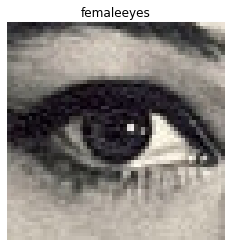

In [ ]:
img = view_random_image(target_dir='dataset/train/', target_class='femaleeyes')

### Image Processing

now our images are in diffirent shape we need to make it in shape (batch_size, 224, 224, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


train_datagen = ImageDataGenerator(rescale=1./225)
test_datagen = ImageDataGenerator(rescale=1./225)

train_dir = 'dataset/train/'
test_dir = 'dataset/test/'

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMAGE_SHAPE,
                                               class_mode='binary',
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=BATCH_SIZE,
                                               target_size=IMAGE_SHAPE,
                                               class_mode='binary',
                                               seed=42)


Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


###Creating the model



In [ ]:
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
efficient_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
efficient_b7_url = 'https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1'

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
model = create_model(model_url=efficient_b7_url,
                     num_classes=1)

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
feature_extraction_layer (Ke (None, 2560)              64097680  
_________________________________________________________________
output_layer (Dense)         (None, 1)                 2561      
Total params: 64,100,241
Trainable params: 2,561
Non-trainable params: 64,097,680
_________________________________________________________________


In [ ]:
model_history = model.fit(train_data,
                          epochs=10,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                 experiment_name="efficientNetB7")])

Saving TensorBoard log files to: tensorflow_hub/efficientNetB7/20210927-114708
Epoch 1/10
16/16 [==============================] - 19s 1s/step - loss: 0.3986 - accuracy: 0.8420 - val_loss: 0.3684 - val_accuracy: 0.8600
Epoch 2/10
16/16 [==============================] - 14s 878ms/step - loss: 0.3834 - accuracy: 0.8620 - val_loss: 0.3586 - val_accuracy: 0.8800
Epoch 3/10
16/16 [==============================] - 14s 879ms/step - loss: 0.3710 - accuracy: 0.8680 - val_loss: 0.3486 - val_accuracy: 0.8500
Epoch 4/10
16/16 [==============================] - 14s 882ms/step - loss: 0.3560 - accuracy: 0.8580 - val_loss: 0.3388 - val_accuracy: 0.8700
Epoch 5/10
16/16 [==============================] - 14s 878ms/step - loss: 0.3472 - accuracy: 0.8640 - val_loss: 0.3354 - val_accuracy: 0.8400
Epoch 6/10
16/16 [==============================] - 14s 881ms/step - loss: 0.3375 - accuracy: 0.8720 - val_loss: 0.3248 - val_accuracy: 0.8800
Epoch 7/10
16/16 [==============================] - 14s 903ms/step

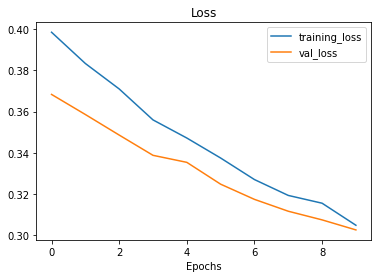

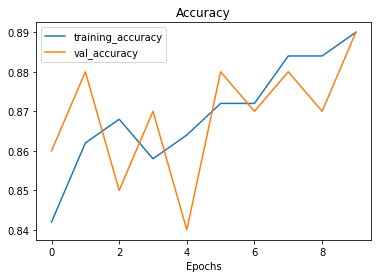

In [ ]:
plot_loss_curves(model_history)

###Saving the model

In [ ]:
model.save('drive/MyDrive/Kaggle/efficientNetB7_model')

INFO:tensorflow:Assets written to: drive/MyDrive/Kaggle/efficientNetB7_model/assets


INFO:tensorflow:Assets written to: drive/MyDrive/Kaggle/efficientNetB7_model/assets


[[0.22406676]]


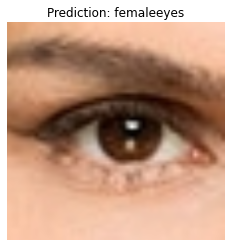

In [ ]:
pred_and_plot(model, 'drive/MyDrive/Kaggle/data/test/femaleeyes/4146.jpg', classes_names)

###Second model full dataset

In [ ]:
# numbers = 1157
# counter = 0
# for filename in os.listdir('drive/MyDrive/Kaggle/data/train/femaleeyes/'):
#   counter = counter + 1
#   file_path = os.path.join('drive/MyDrive/Kaggle/data/train/femaleeyes/', filename)
#   if os.path.exists(file_path):
#     shutil.copy(file_path, 'fulldata/femaleeyes/')
#     print(f"Copying {file_path} / {counter}")   
#   else:
#     print("NO")
#   if counter == numbers:
#     break
  



In [ ]:
loaded_model = tf.keras.models.load_model('drive/MyDrive/Kaggle/efficientNetB7_model')

[[0.22406676]]


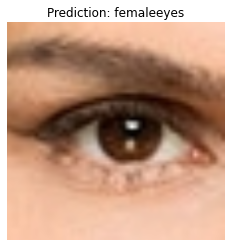

In [ ]:
pred_and_plot(loaded_model, 'drive/MyDrive/Kaggle/data/test/femaleeyes/4146.jpg', classes_names)

In [ ]:
model_2 = create_model(model_url=efficient_b7_url,
                     num_classes=1)

model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'])



In [ ]:
os.listdir('fulldata/')

['femaleeyes', 'maleeyes']

In [ ]:
train_data_2 = train_datagen.flow_from_directory('fulldata/',
                                               batch_size=BATCH_SIZE,
                                               target_size=IMAGE_SHAPE,
                                               class_mode='binary',
                                               seed=42)

Found 2314 images belonging to 2 classes.


In [ ]:
model_2_history = model_2.fit(train_data_2,
                          epochs=10,
                          steps_per_epoch=len(train_data_2),
                          validation_data=test_data,
                          validation_steps=len(test_data),
                          callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub",
                                                                 experiment_name="efficientNetB7_long")])

Saving TensorBoard log files to: tensorflow_hub/efficientNetB7_long/20210927-130816
Epoch 1/10
47/73 [==================>...........] - ETA: 23s - loss: 0.5482 - accuracy: 0.7354

UnknownError: ignored

In [ ]:
model_2.save('drive/MyDrive/Kaggle/efficientNetB7_model_2')